In [1]:
# --------------------------------------------------
# 1. Import Libraries
# --------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

# Set plot style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
# --------------------------------------------------
# 2. Load and Prepare the Dataset (from CSV) - CORRECTED
# --------------------------------------------------
# Load the data from the 'data' folder
dataset = pd.read_csv('../data/breast-cancer.csv')

# Inspect the first few rows to understand the structure
print("First 5 rows of the dataset:")
print(dataset.head())

# The target variable is 'diagnosis'. We convert it to numbers (M=0, B=1).
# We also drop the 'id' column as it is not a useful feature.
X = dataset.drop(['id', 'diagnosis'], axis=1)
y = dataset['diagnosis'].map({'M': 0, 'B': 1}) # Malignant: 0, Benign: 1

print("\nDataset has been loaded from CSV.")
print("Shape of feature data (X):", X.shape)
print("Target variable distribution (y):")
print(y.value_counts())

First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_wor

In [3]:
# --------------------------------------------------
# 3. Data Preprocessing
# --------------------------------------------------
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (essential for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData has been split and scaled.")


Data has been split and scaled.


In [4]:
# --------------------------------------------------
# 4. Model 1: Basic SVM with Linear Kernel
# --------------------------------------------------
print("--- Model 1: Linear Kernel SVM ---")
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_scaled, y_train)

y_pred_linear = linear_svm.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))

--- Model 1: Linear Kernel SVM ---
Accuracy: 95.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [5]:
# --------------------------------------------------
# 5. Model 2: Basic SVM with RBF Kernel
# --------------------------------------------------
print("\n--- Model 2: RBF Kernel SVM (Default Parameters) ---")
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)

y_pred_rbf = rbf_svm.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))


--- Model 2: RBF Kernel SVM (Default Parameters) ---
Accuracy: 98.25%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [6]:
# --------------------------------------------------
# 6. Model 3: Hyperparameter Tuning with GridSearchCV
# This is our key "Above and Beyond" step.
# --------------------------------------------------
print("\n--- Model 3: Hyperparameter Tuning using GridSearchCV ---")
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf']
}

# Instantiate GridSearchCV
# cv=5 means 5-fold cross-validation
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=5)

# Fit the model to the data
grid.fit(X_train_scaled, y_train)

# Print the best parameters found
print("\nBest parameters found by GridSearchCV:")
print(grid.best_params_)

# Evaluate the best model on the test set
grid_predictions = grid.predict(X_test_scaled)
print(f"\nAccuracy of Tuned Model: {accuracy_score(y_test, grid_predictions) * 100:.2f}%")
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, grid_predictions))


--- Model 3: Hyperparameter Tuning using GridSearchCV ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

C:\Users\ketaki\AppData\Local\Temp\ipykernel_55844\2288176124.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


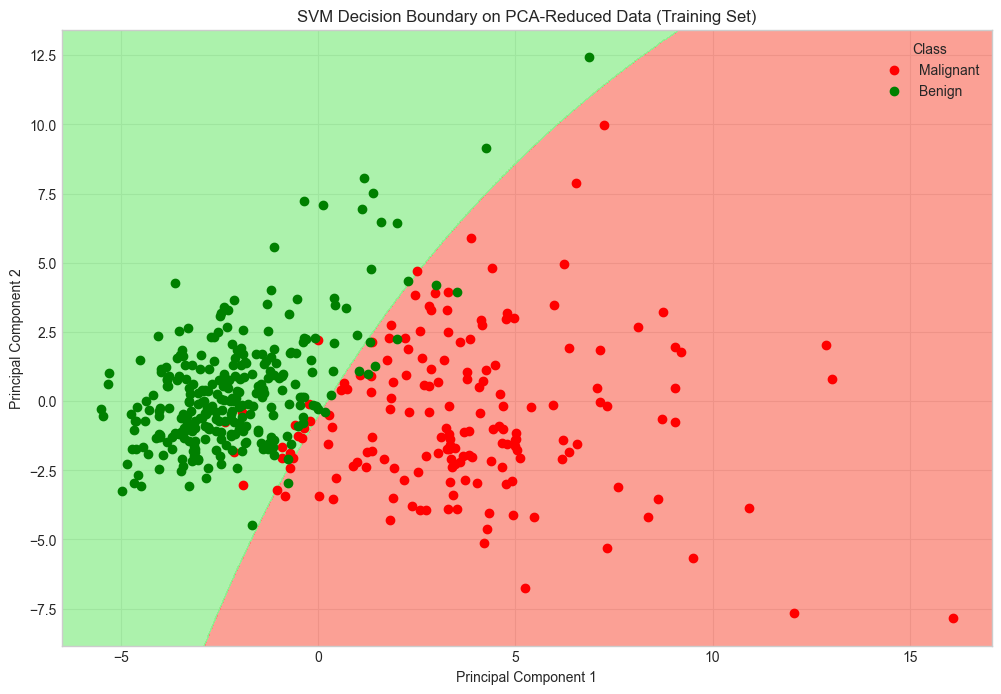

In [7]:
# ----------------------------------------------------------------
# 7. CORRECTED - Visualization with PCA
# ----------------------------------------------------------------
# Reduce dimensionality from 30 features to 2 for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled) # Also transform the test set for plotting

# --- THIS IS THE KEY FIX ---
# We must train a NEW SVM model on the 2-dimensional PCA data.
svm_for_visualization = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], random_state=42)
svm_for_visualization.fit(X_train_pca, y_train)
# -------------------------

# Create a meshgrid for the plot
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.02))

# Plot the decision boundary using the NEW 2D model
plt.figure(figsize=(12, 8))
plt.contourf(X1, X2, svm_for_visualization.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the training set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('SVM Decision Boundary on PCA-Reduced Data (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', labels=['Malignant', 'Benign'])
plt.savefig('../visualizations/svm_decision_boundary_pca.png')
plt.show()